In [1]:
import sys, os, time
import shutil
# %load_ext autoreload
# %autoreload 2
os.environ['FOUNDATION_RUN_MODE'] = 'jupyter'
os.environ['FOUNDATION_SAVE_DIR'] = '/is/ei/fleeb/workspace/chome/trained_nets'
os.environ['FOUNDATION_DATA_DIR'] = '/is/ei/fleeb/workspace/local_data'
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
from IPython import display
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.distributions as distrib
import torch.multiprocessing as mp
import torchvision.models
import torchvision

from torch.utils.data import Dataset, DataLoader, TensorDataset
import gym
import numpy as np
%matplotlib notebook
# %matplotlib tk
import matplotlib.pyplot as plt
import imageio
import seaborn as sns
# plt.switch_backend('Agg') #('Qt5Agg')
import foundation as fd
from foundation import models
from foundation import util
from foundation import train

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from bisect import bisect_left

# from IPython.display import HTML, Image

#from foundation.util import replicate, Cloner

from hybrid import get_model, get_data
from analyze import *

from tqdm import tqdm_notebook as tqdm

plt.ioff()

np.set_printoptions(linewidth=120, suppress=True)

In [2]:
M = Hybrid_Controller().filter_strs('!test')

Found 239 runs


In [3]:
# M.clear_filters().filter_strs('!test').filter_jobs(167, 168).show_incomplete()

In [4]:
M.clear_run_cache()

In [5]:
M.clear_filters().filter_strs('!test')

# M.filter_since(date='200114').filter_data('rgbball')
# M.filter_jobs(157, 158)
# M.filter_jobs(169)
# M.filter_jobs(137)
M.filter_jobs(174, 175)
# M.filter_models('vae')
# M.filter_jobs(94, 122) # basic models
# M.filter_jobs(100, 102)
# M.filter(lambda r: 'adain-dec' in r.config.info.history)
# M.filter_models('wae')

# M.filter_checkpoints(60)

# M.load_configs(60)

# M.load_configs(100)

M.show()

  0 - 3dshapes-dwae_0174-6007668-11_200122-210934
  1 - 3dshapes-fdwae_0174-6007668-12_200122-211056
  2 - 3dshapes-fvae_0174-6007668-07_200122-210719
  3 - 3dshapes-fvae_0174-6007668-08_200122-210745
  4 - 3dshapes-fvae_0174-6007668-09_200122-210741
  5 - 3dshapes-fwae_0174-6007668-04_200122-205919
  6 - 3dshapes-fwae_0174-6007668-05_200122-210402
  7 - 3dshapes-fwae_0174-6007668-06_200122-210602
  8 - 3dshapes-vae_0174-6007668-02_200122-204250
  9 - 3dshapes-vae_0174-6007668-03_200122-205908
 10 - 3dshapes-wae_0174-6007668-00_200122-204130
 11 - 3dshapes-wae_0174-6007668-01_200122-204131
 12 - 3dshapes-wae_0175-6008040-00_200123-115210
 13 - 3dshapes-wgan_0174-6007668-13_200122-211507
 14 - 3dshapes-wpp_0174-6007668-10_200122-210744


In [6]:
M.show_unique()

  0) 3dshapes-dwae_0174-6007668-11_200122-210934
Selecting checkpoint: last


/is/ei/fleeb/workspace/foundation/foundation/train/config.py:66: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f)


	model.latent_dim - 12 (16)

  1) 3dshapes-fdwae_0174-6007668-12_200122-211056
	model.latent_dim - 12 (16)

  2) 3dshapes-fvae_0174-6007668-07_200122-210719
	model.latent_dim - 12 (16)
	model.latent_reg_wt - 2 (1)

  3) 3dshapes-fvae_0174-6007668-08_200122-210745
	model.latent_dim - 12 (16)
	model.latent_reg_wt - 8 (1)

  4) 3dshapes-fvae_0174-6007668-09_200122-210741
	model.latent_dim - 12 (16)
	model.latent_reg_wt - 5 (1)
	model.reg_prior - 0.2 (0.5)

  5) 3dshapes-fwae_0174-6007668-04_200122-205919
	model.latent_dim - 12 (16)

  6) 3dshapes-fwae_0174-6007668-05_200122-210402
	model.latent_dim - 12 (16)
	model.latent_reg_wt - 1000 (100)
	model.reg_prior - 0.1 (0.5)

  7) 3dshapes-fwae_0174-6007668-06_200122-210602
	model.latent_dim - 12 (16)
	model.latent_reg_wt - 1000 (100)
	model.reg_prior - 0.01 (0.5)

  8) 3dshapes-vae_0174-6007668-02_200122-204250
	model.latent_dim - 12 (16)

  9) 3dshapes-vae_0174-6007668-03_200122-205908
	model.latent_dim - 12 (16)
	model.latent_reg_wt - 4 (1)

In [7]:
M.clear_run_cache()

In [8]:
run = M[0]
run.name

'3dshapes-dwae_0174-6007668-11_200122-210934'

In [9]:
S = run.reset()



In [10]:
# S.bounds = -2,2
run.load(pbar=tqdm)



/is/ei/fleeb/workspace/chome/trained_nets/3dshapes-dwae_0174-6007668-11_200122-210934/checkpoint_100.pth.tar
True
load successful
Loaded /is/ei/fleeb/workspace/chome/trained_nets/3dshapes-dwae_0174-6007668-11_200122-210934/checkpoint_100.pth.tar
Set dataroot to: /is/ei/fleeb/workspace/local_data
name: 3dshapes
Not enough memory to move dataset to cuda
Dataset din=(3, 64, 64), dout=(3, 64, 64)
Model-type: dwae
prob: 0.5
prob_max: None (by default)
encoder (type=double-enc): 
  in_shape --> din: (3, 64, 64) (by parent)
  channels: [64, 64, 64, 128, 128] (by parent)
  factors: 2 (by parent)
  internal_channels: [None, None, None, None, None] (by default)
  squeeze: [False, False, False, False, False] (by default)
  output_nonlin: None (by default)
  latent_dim: 12 (by parent)
  tail (type=nn): 
    input_dim --> din: (128, 2, 2)
    output_dim --> dout: 12
    hidden_dims: [256, 128]
    nonlin: elu (by parent)
    output_nonlin: None (by default)
  nonlin: elu (by parent)
  output_nonlin

In [11]:
run.run(pbar=tqdm)

Using batched data loader
valset: 38400
Using batched data loader



torch.Size([38400, 12])


In [12]:
S.ckpt_path

'/is/ei/fleeb/workspace/chome/trained_nets/3dshapes-dwae_0174-6007668-11_200122-210934/checkpoint_100.pth.tar'

In [13]:
viz = run.visualize(tqdm)
len(viz), viz.keys()

--- Visualizing: original
... took: 0.10

--- Visualizing: recs
... took: 0.17

--- Visualizing: gens
... took: 0.10

--- Visualizing: hybrid
... took: 0.10

--- Visualizing: latent
... took: 0.98

--- Visualizing: effects
... took: 0.09

--- Visualizing: traversals
... took: 0.00




(7,
 dict_keys(['original', 'recs', 'gens', 'hybrid', 'latent', 'effects', 'traversals']))

<IPython.core.display.Javascript object>


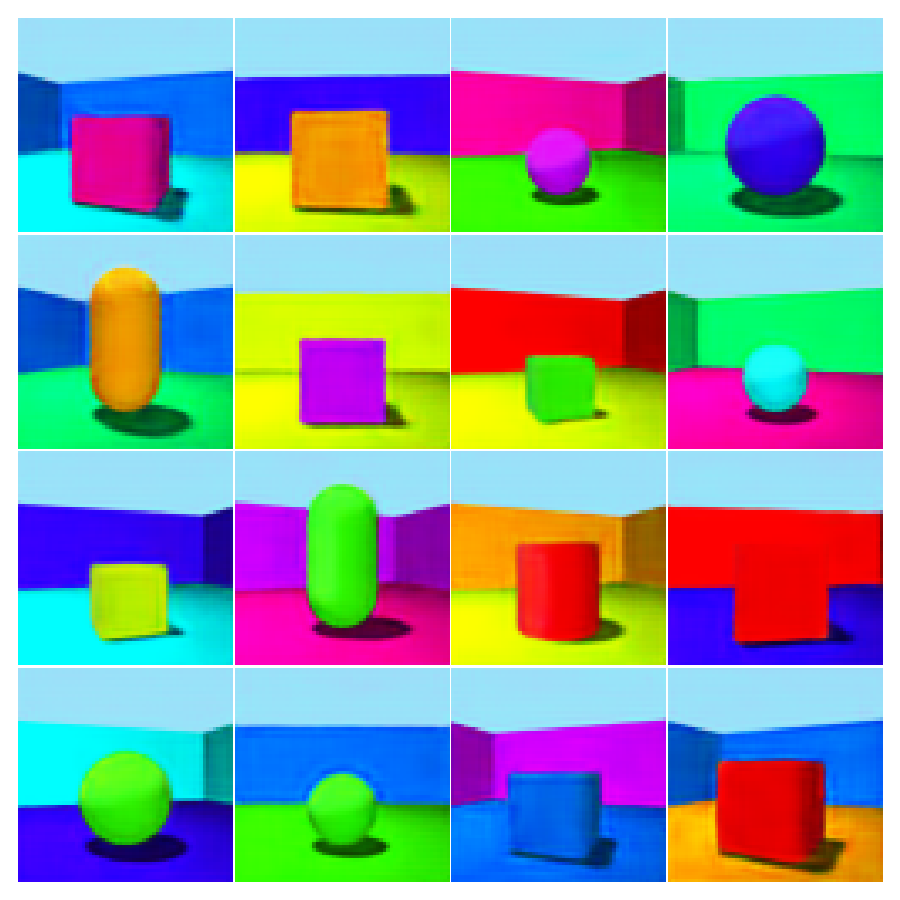

In [14]:
viz['recs'][0].view(scale=2)

<IPython.core.display.Javascript object>


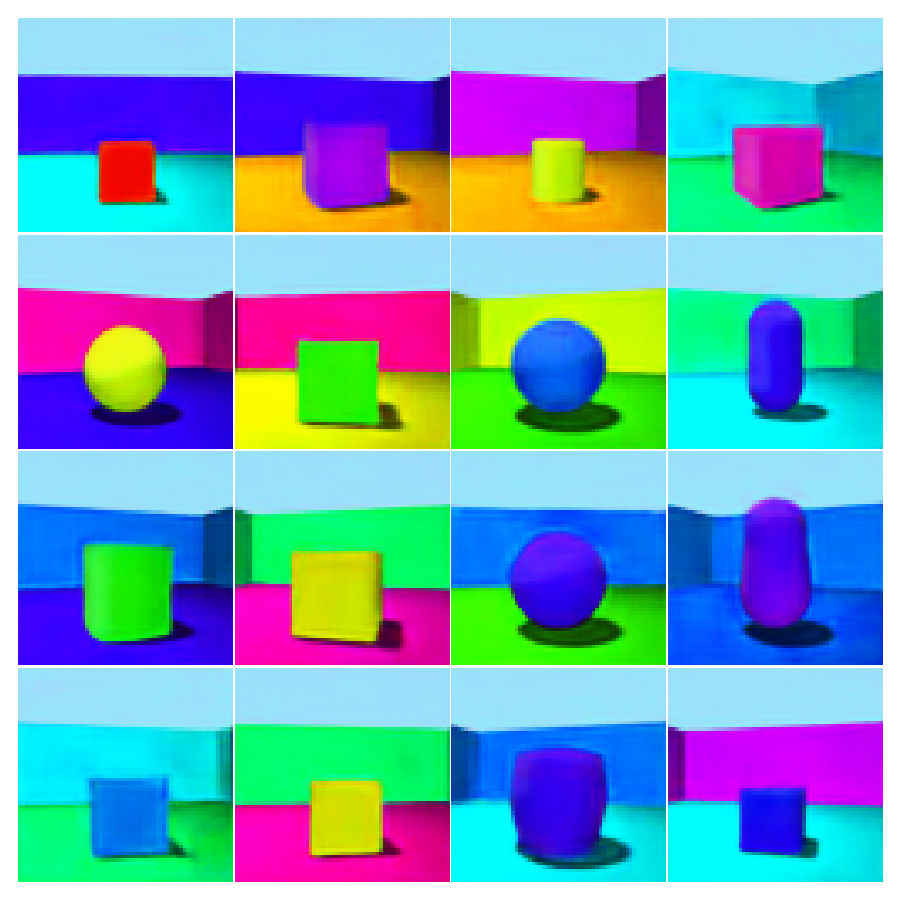

In [15]:
viz['hybrid'][0].view(scale=2)

<IPython.core.display.Javascript object>


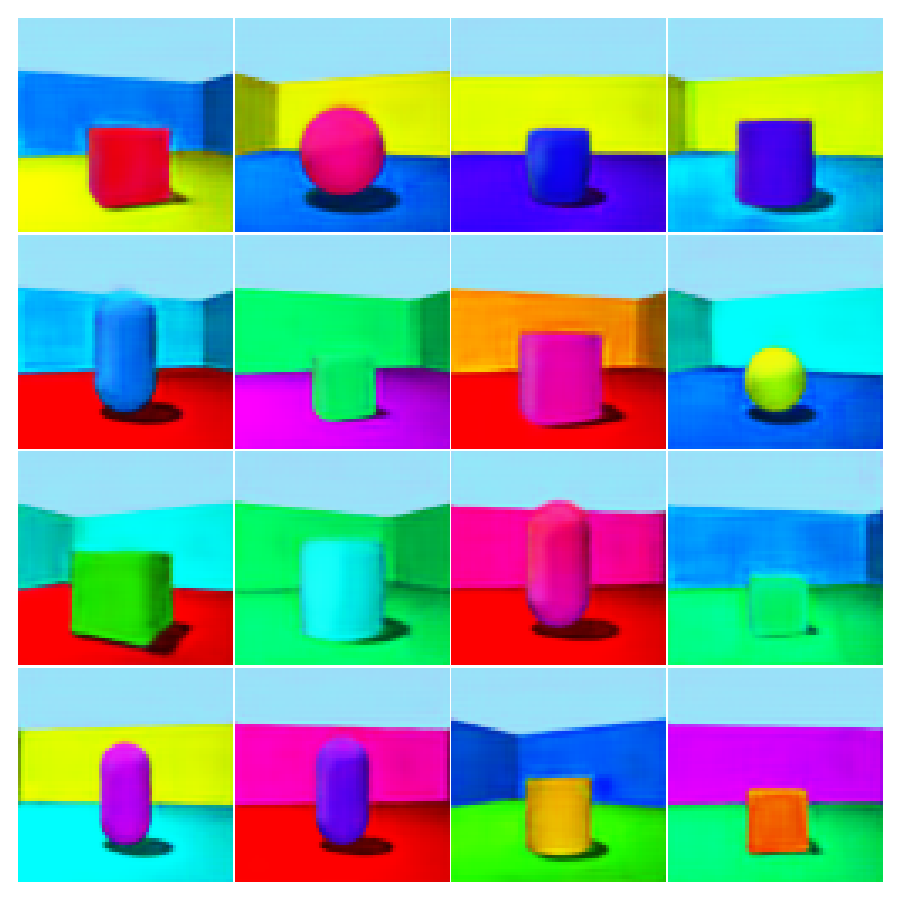

In [16]:
viz['gens'][0].view(scale=2)

In [17]:
viz['traversals'][2].view(scale=2)

<IPython.core.display.Javascript object>


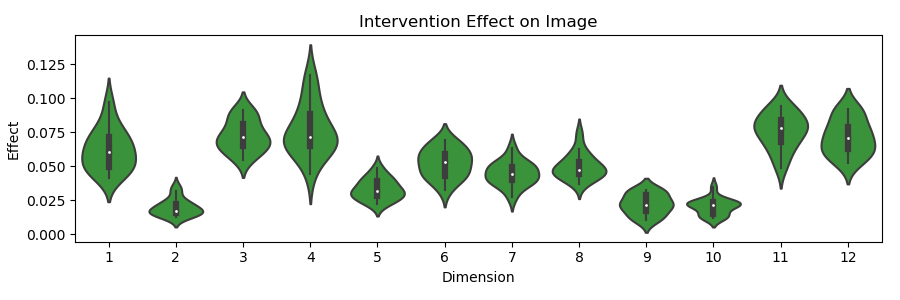

In [18]:
viz['effects'][0].view(scale=2)

<IPython.core.display.Javascript object>


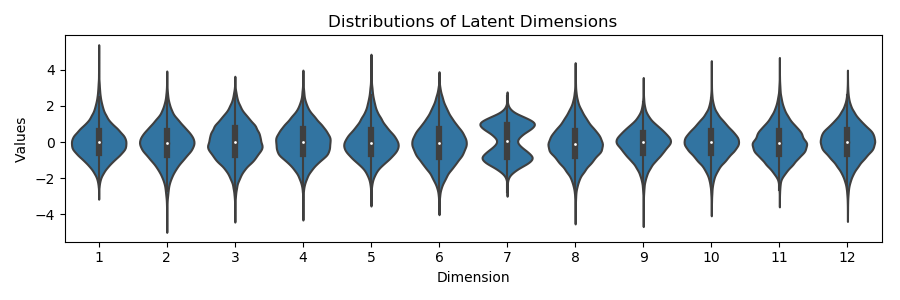

In [19]:
fig = viz['latent'][0].view(scale=2)
# plt.figure(fig.number)
# ax = fig.get_axes()[0]
# ax.set_ylim(-3, 3)
fig

In [18]:
evals = run.evaluate(pbar=tqdm)

--- Evaluating: FID-prior


Updated 1 keys: ['fid_gen_stats']
Saved updated checkpoint to: /is/ei/fleeb/workspace/chome/trained_nets/3dshapes-fwae_0174-6007668-05_200122-210402/checkpoint_100.pth.tar
... took: 132.57
FID-prior: 37.914281800722534

--- Evaluating: FID-hyb


Updated 1 keys: ['fid_gen_stats']
Saved updated checkpoint to: /is/ei/fleeb/workspace/chome/trained_nets/3dshapes-fwae_0174-6007668-05_200122-210402/checkpoint_100.pth.tar
... took: 136.41
FID-hyb: 29.754048319193146

--- Evaluating: FID-rec


Updated 1 keys: ['fid_gen_stats']
Saved updated checkpoint to: /is/ei/fleeb/workspace/chome/trained_nets/3dshapes-fwae_0174-6007668-05_200122-210402/checkpoint_100.pth.tar
... took: 136.33
FID-rec: 21.22978828794615

--- Evaluating: IRS
... took: 32.31
IRS: {'IRS': 0.7795272279941797, 'num_active_dims': 126.71598}

--- Evaluating: MIG
... took: 1.62
MIG: {'discrete_mig': 0.2044241761646143}

--- Evaluating: DCI
... took: 55.82
DCI: {'informativeness_train': 0.9505666666666667, 'informativeness_test': 0.8843333333333333, 'disentanglement': 0.6654147542449205, 'completeness': 0.5539993027906891}

--- Evaluating: SAP
... took: 9.60
SAP: {'SAP_score': 0.12760000000000002}

--- Evaluating: ModExp


/is/ei/fleeb/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/is/ei/fleeb/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/is/ei/fleeb/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/is/ei/fleeb/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/is/ei/fleeb/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/lo

... took: 2.86
ModExp: {'modularity_score': 0.9662654124677933, 'explicitness_score_train': 0.9472623845350762, 'explicitness_score_test': 0.9433890658336878}

--- Evaluating: Unsup
... took: 2.27
Unsup: {'gaussian_total_correlation': 0.020290472544994775, 'gaussian_wasserstein_correlation': 0.02033023395993183, 'gaussian_wasserstein_correlation_norm': 0.0008737584629277581, 'mutual_info_score': 0.06459659827995119}



In [19]:
update_checkpoint(S, 'evals', overwrite=True)

Updated 1 keys: ['evals']
Saved updated checkpoint to: /is/ei/fleeb/workspace/chome/trained_nets/3dshapes-fwae_0174-6007668-05_200122-210402/checkpoint_100.pth.tar


In [20]:
# 'FID-prior': 52.483717550697236,
#  'FID-hyb': 51.906775365647974,
#  'FID-rec': 38.42281377504153,

In [21]:
# S.keys()

In [22]:
# S.hello = 'world'

In [23]:
# update_checkpoint(S, 'hello')

In [24]:
# viz_

In [25]:
# S.fid_gen_stats.keys()

In [26]:
# update_checkpoint(S, 'fid_gen_stats', overwrite=True)

In [27]:
# import pickle

In [28]:
# path = os.path.join(os.environ["FOUNDATION_DATA_DIR"], '3dshapes', '3dshapes_stats_fid.pkl')
# f = pickle.load(open(path,'rb'))

In [29]:
# f

In [30]:
# run.state.keys()

In [31]:
# model = run.state.model

In [32]:
# q = run.state.q
# q.shape

In [33]:
# with torch.no_grad():
#     imgs = model.decode(q.div(100))
# imgs.shape

In [34]:
# show_nums(imgs)

In [20]:
# media_root = '/is/ei/fleeb/workspace/media/hybrid/results/'
# run.save(media_root)

Saving results to: /is/ei/fleeb/workspace/media/hybrid/results/3dshapes-dwae_0174-6007668-11_200122-210934_ckpt100
	Model saved
	Config saved
	Visualization saved


'/is/ei/fleeb/workspace/media/hybrid/results/3dshapes-dwae_0174-6007668-11_200122-210934_ckpt100'